###Adding libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

###Load data

In [2]:
cancer = load_breast_cancer()

###Separation of data into test and training

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [4]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

###Learning with a different number of neighbors

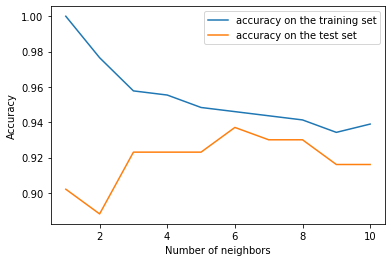

In [5]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="accuracy on the training set")
plt.plot(neighbors_settings, test_accuracy, label="accuracy on the test set")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()

###The best choice of the number of neighbors

In [6]:
clf = KNeighborsClassifier()

In [7]:
parametrs = {'n_neighbors': range(1, 11)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf, parametrs)

In [9]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [10]:
grid_search_cv_clf.best_params_

{'n_neighbors': 6}

In [11]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
print("Accuracy on test set: {:.2f}".format(best_clf.score(X_test, y_test)))

Accuracy on test set: 0.94
